In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pickle
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [2]:
file_to_read = open("preprocessed_data.pickle", "rb")

pipe = pickle.load(file_to_read)

file_to_read.close()

2/2 [==============================] - 0s 4ms/step


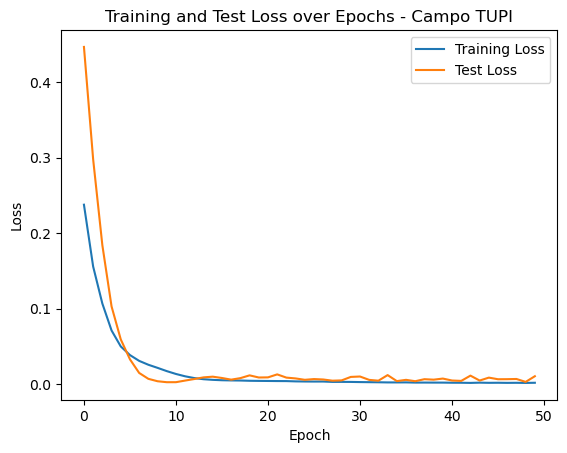

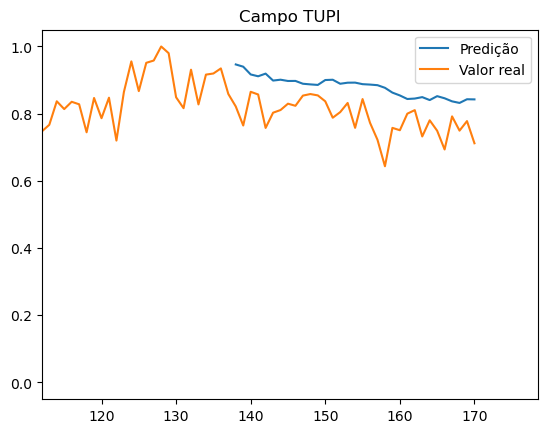

1/1 [==============================] - 0s 104ms/step


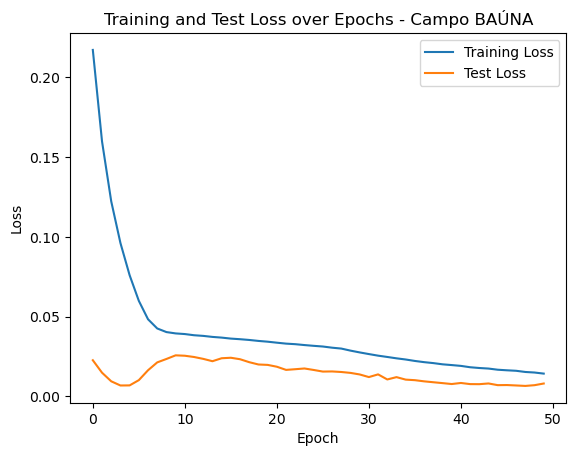

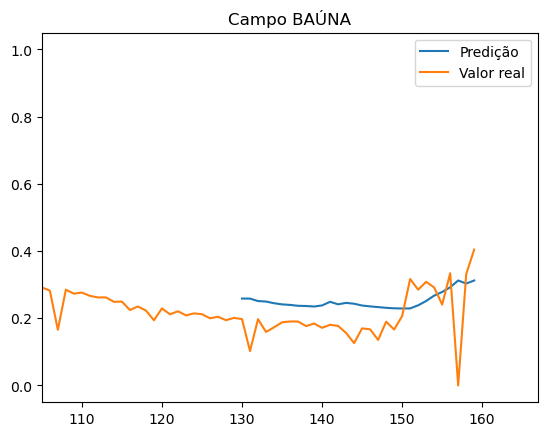

1/1 [==============================] - 0s 103ms/step


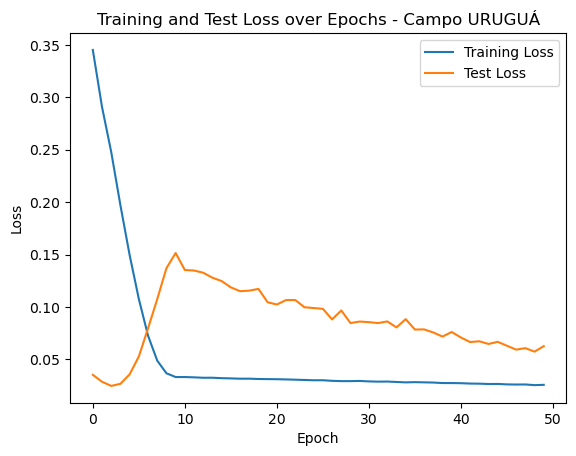

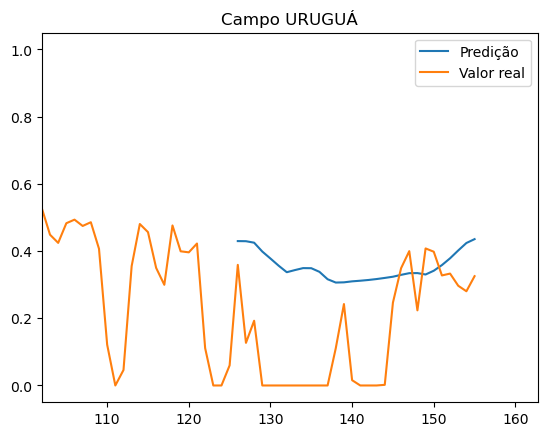

1/1 [==============================] - 0s 101ms/step


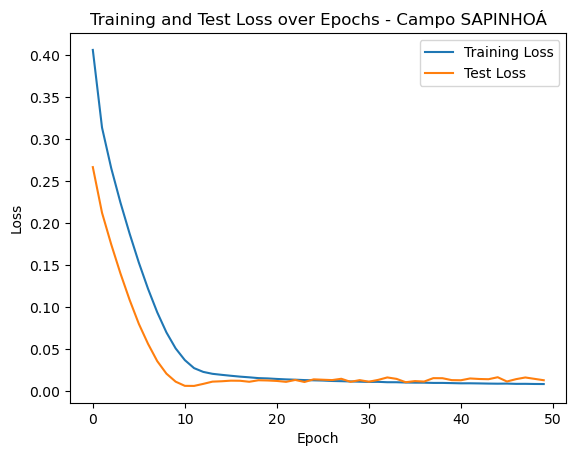

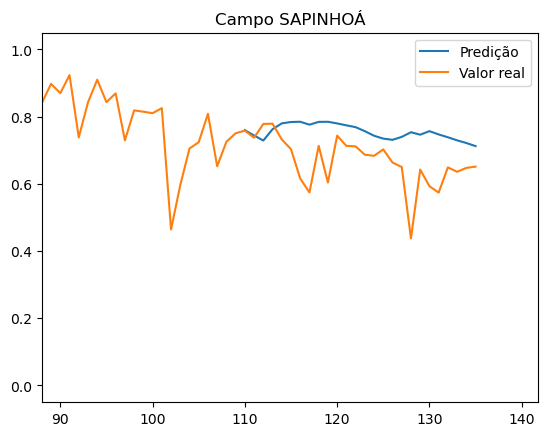

1/1 [==============================] - 0s 107ms/step


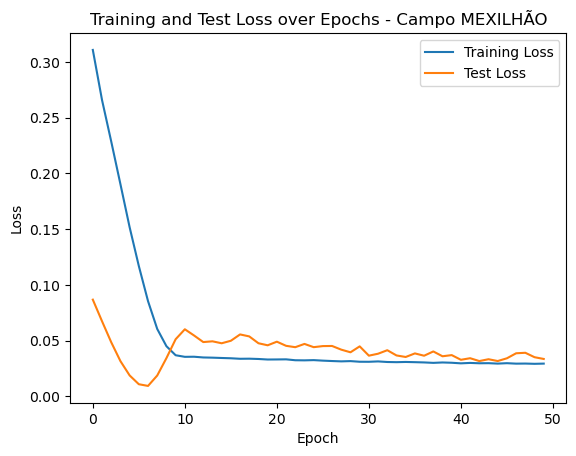

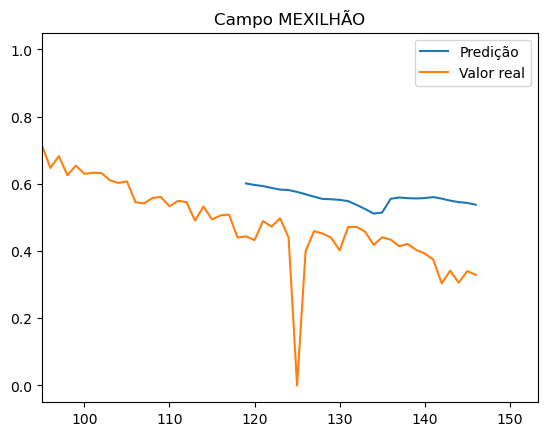

1/1 [==============================] - 0s 105ms/step


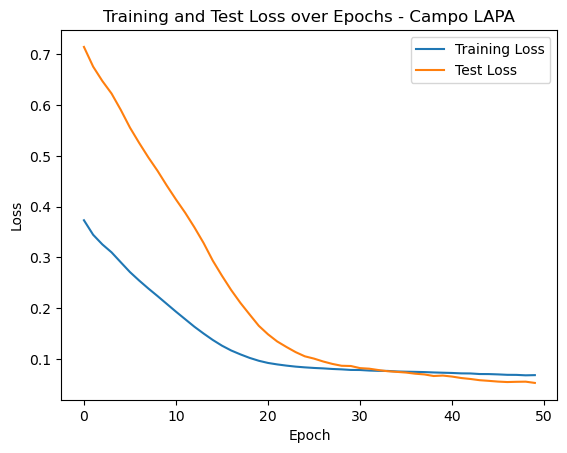

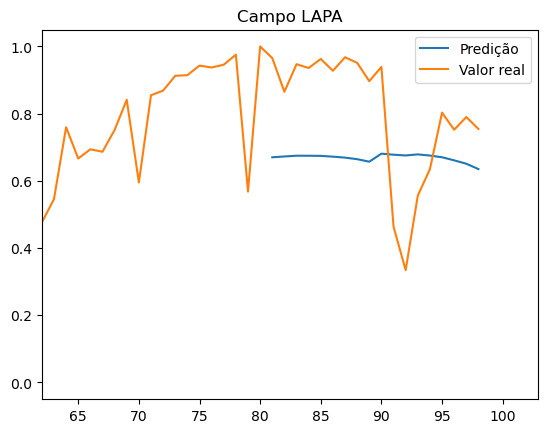

1/1 [==============================] - 0s 101ms/step


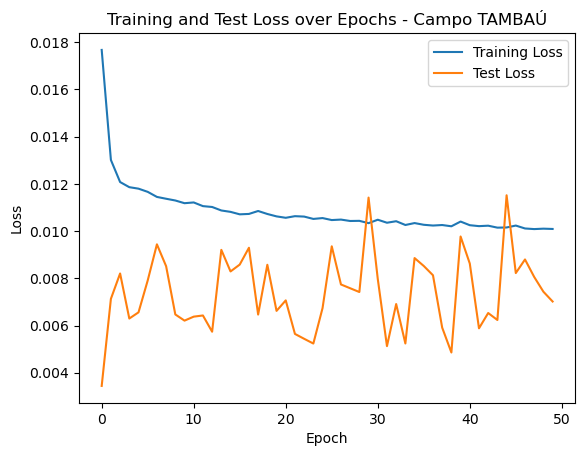

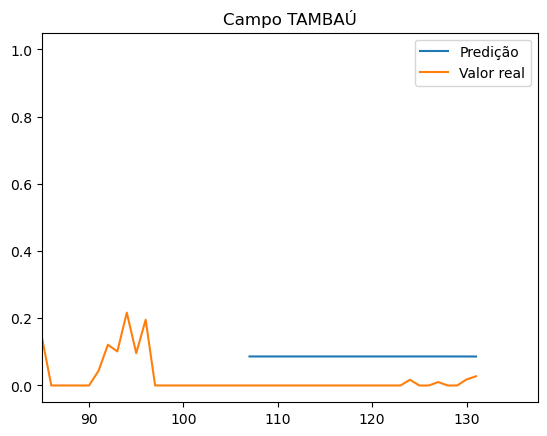

1/1 [==============================] - 0s 99ms/step


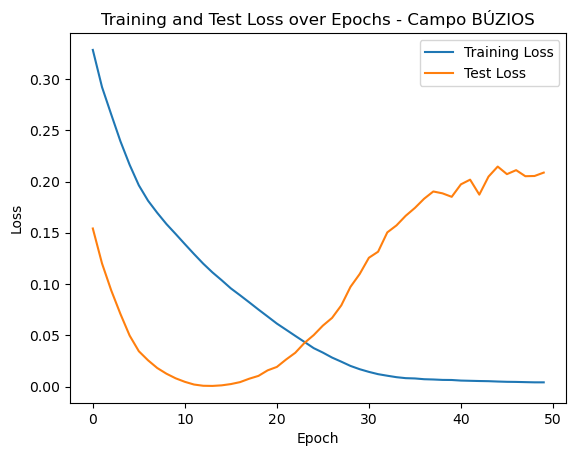

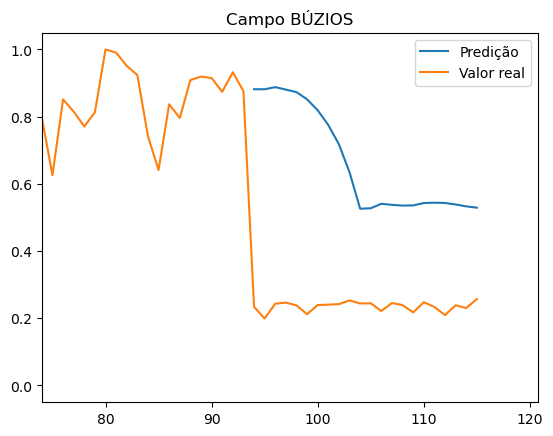

1/1 [==============================] - 0s 106ms/step


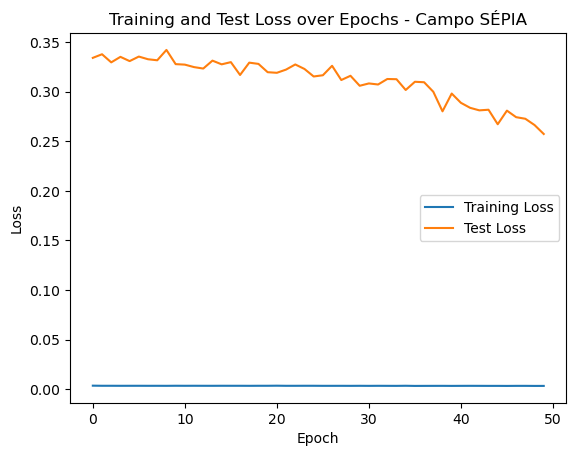

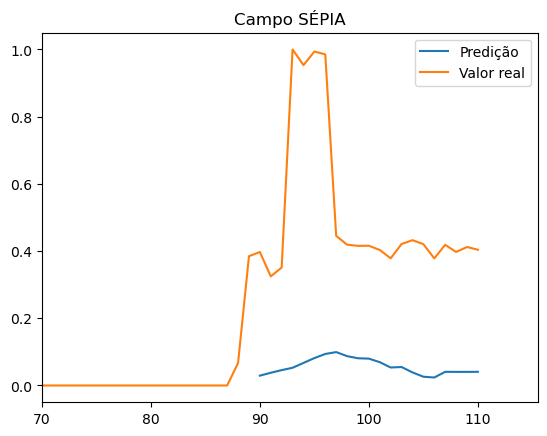

1/1 [==============================] - 0s 103ms/step


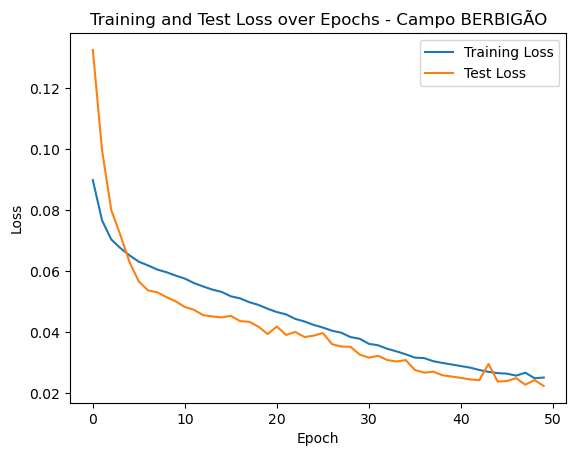

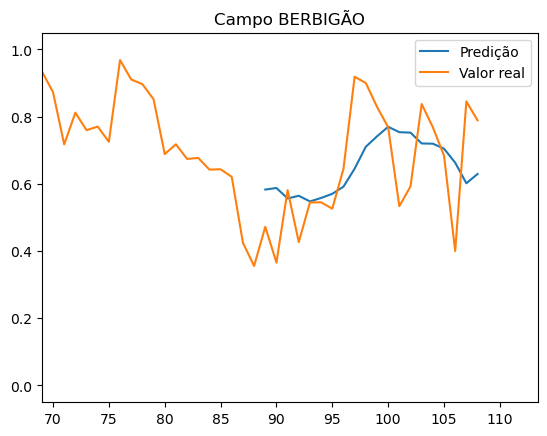

1/1 [==============================] - 0s 109ms/step


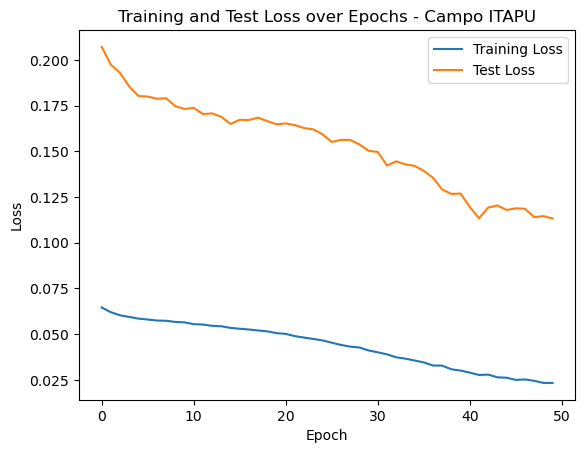

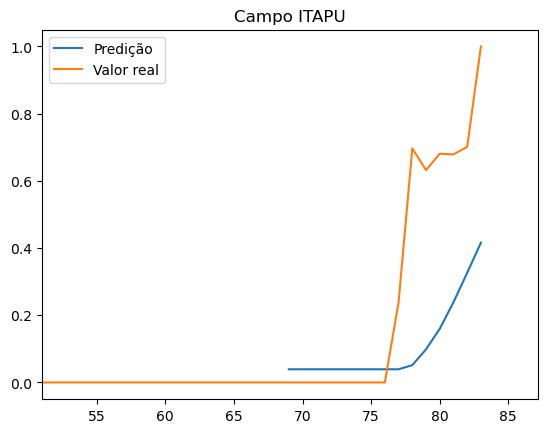

1/1 [==============================] - 0s 101ms/step


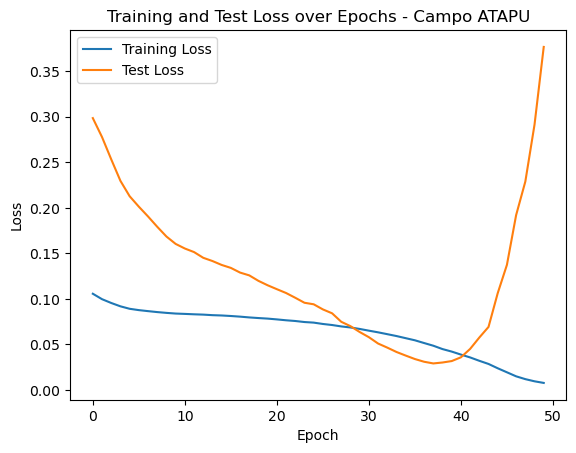

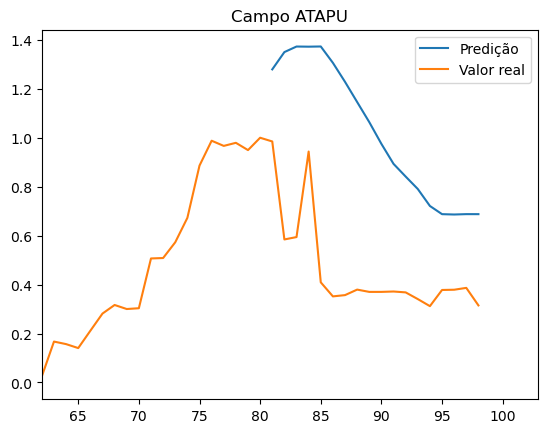

1/1 [==============================] - 0s 105ms/step


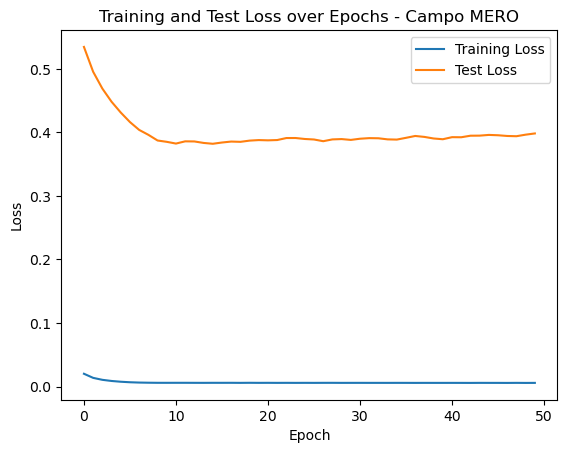

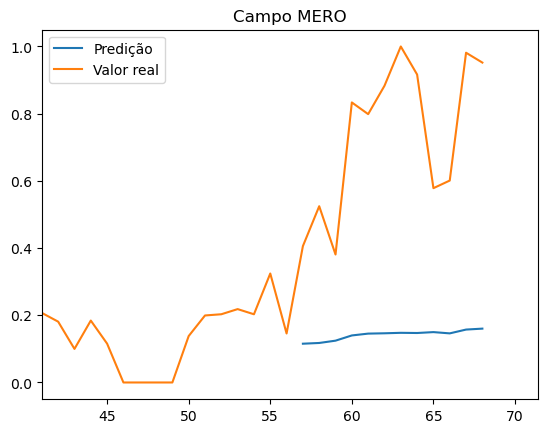

1/1 [==============================] - 0s 109ms/step


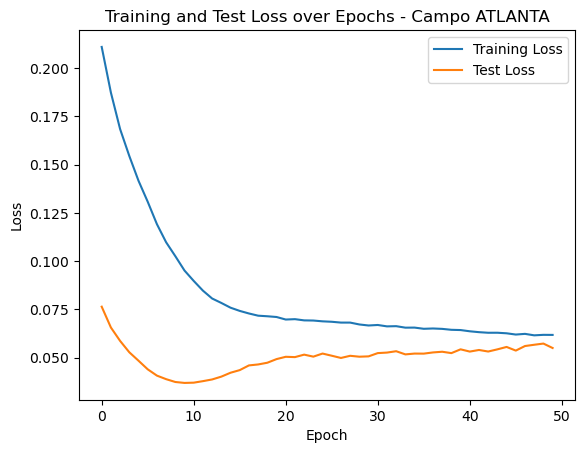

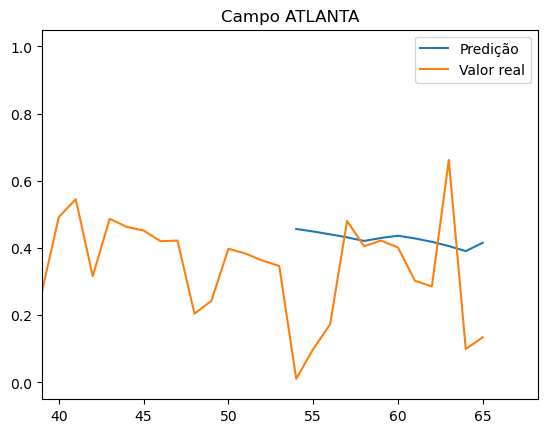

1/1 [==============================] - 0s 109ms/step


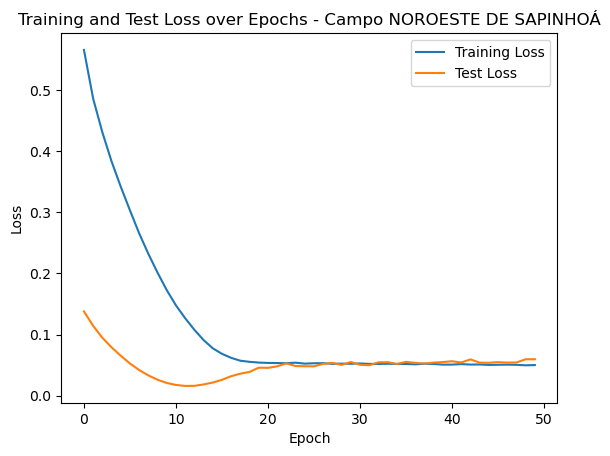

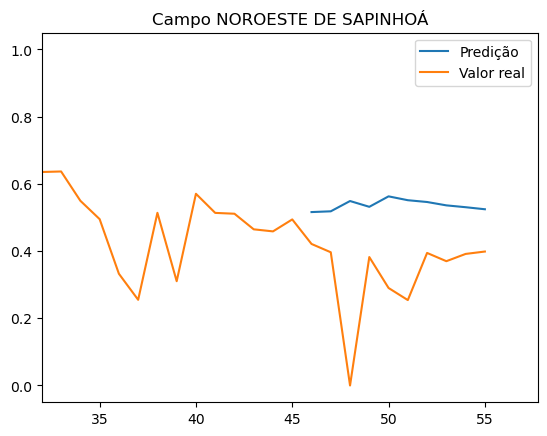

1/1 [==============================] - 0s 103ms/step


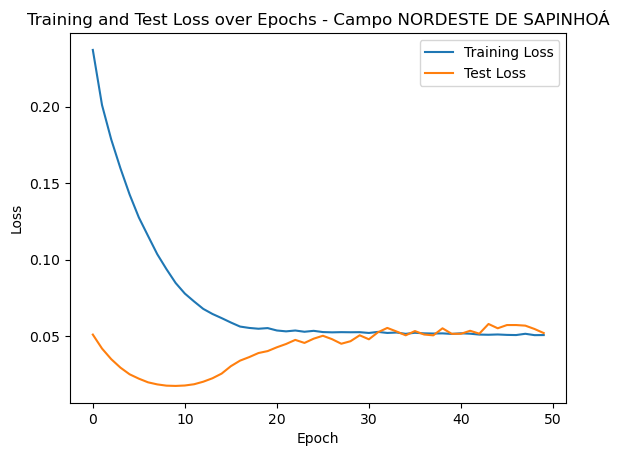

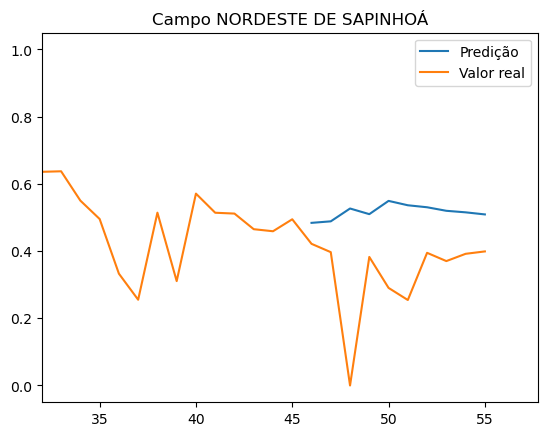

1/1 [==============================] - 0s 105ms/step


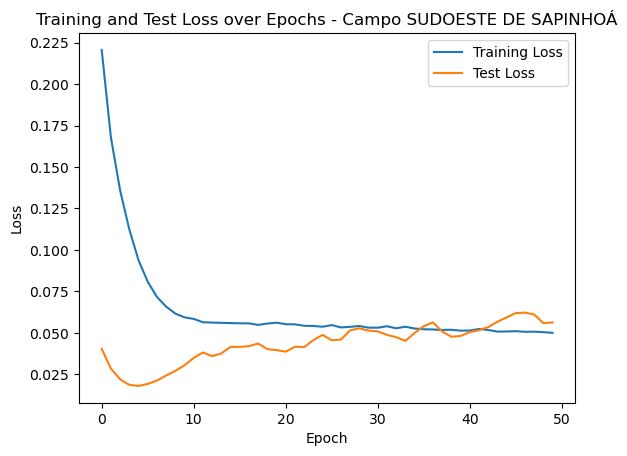

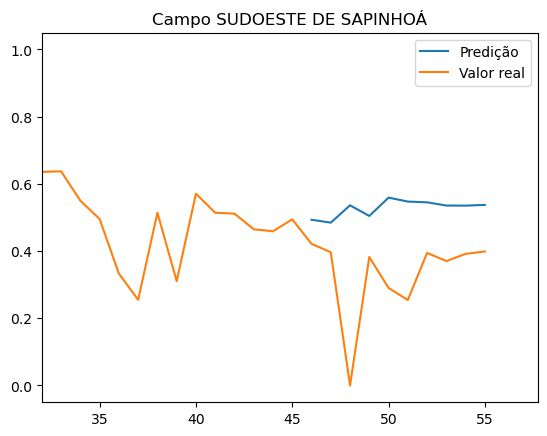

1/1 [==============================] - 0s 109ms/step


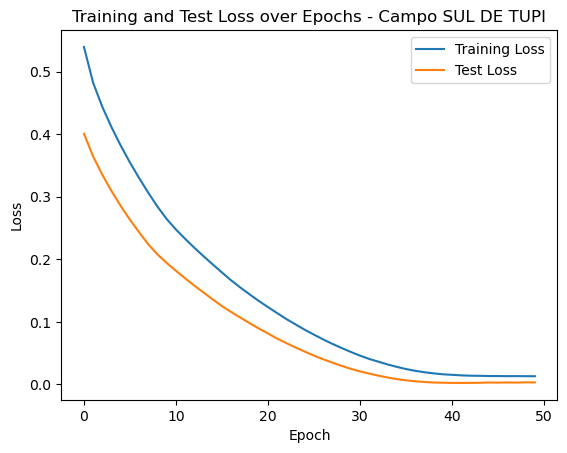

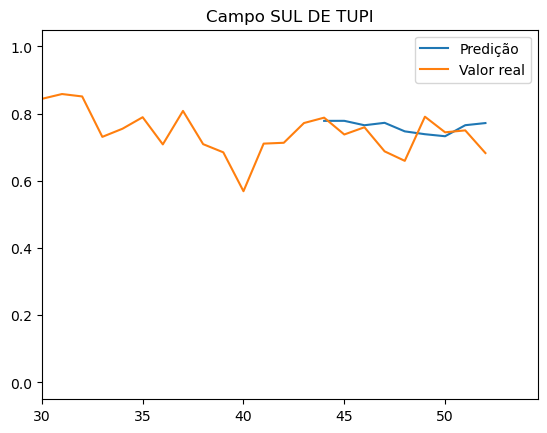

1/1 [==============================] - 0s 103ms/step


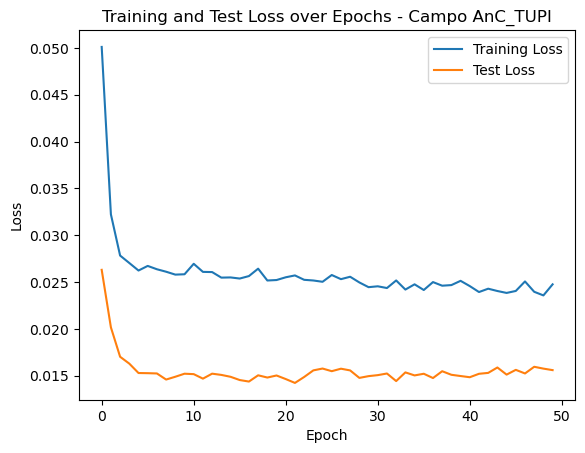

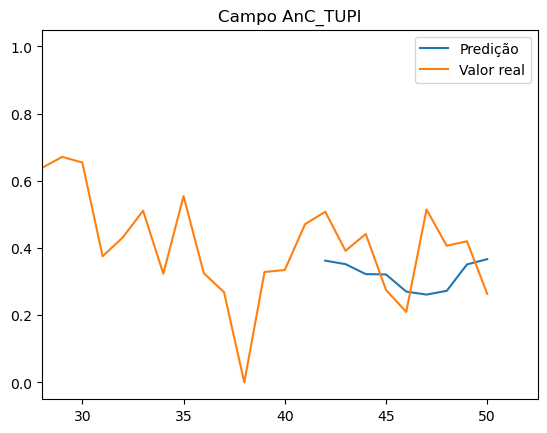

1/1 [==============================] - 0s 105ms/step


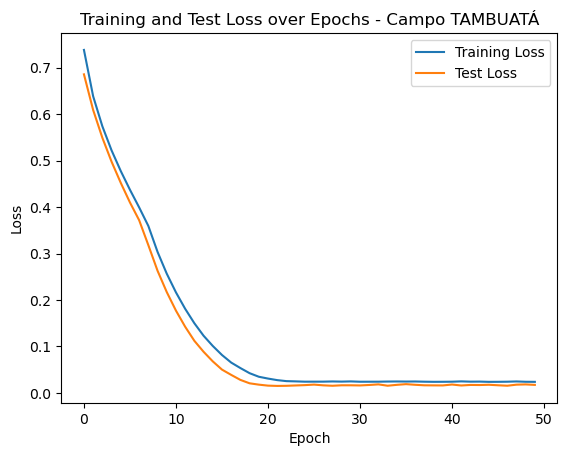

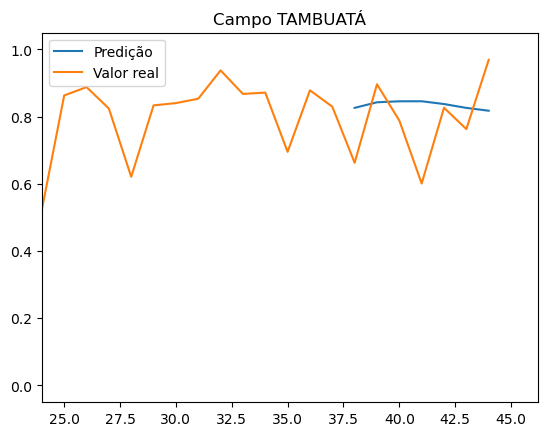

In [3]:
resultados = {
    'campo':[] ,
    #'idx_treino':[] ,
    #'idx_teste': [] ,
    'preds': [] ,
    'y_test':[] ,
    #'modelo': []
}
for campo in pipe.keys():
    #campo = 'TUPI'

    X, y = pipe[campo][0][10:,:-1] , pipe[campo][0][10:,-1]

    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = Sequential([
        GRU(units=8, activation='relu', input_shape=(10, 1)),
        Dense(units=1)
    ])

    model.compile(optimizer='rmsprop', loss='mse')

    history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=0)

    y_preds = model.predict( X_test )


    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('Training and Test Loss over Epochs - Campo '+str(campo))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    #plt.plot(history.history['loss'], label='Training Loss')
    #plt.plot(history.history['val_loss'], label='Test Loss')
    #plt.title('Training and Test Loss over Epochs')
    #plt.xlabel('Epoch')
    #plt.ylabel('Loss')
    #plt.legend()
    #plt.xlim(40)
    #plt.show()

    #Plot of real values and forecasting
    plt.plot(range(10+int(X.shape[0] * 0.8),10+X.shape[0]) ,y_preds.reshape(-1), label='Predição')
    plt.plot(pipe[campo][0][: ,-1], label='Valor real')
    #plt.plot(range(int(0.8 * linhas) , linhas),y_test, label='Valor real')
    plt.legend()
    plt.title('Campo '+str(campo) )
    plt.xlim(int(X.shape[0] * 0.7))
    plt.show()

    resultados['campo'].append(campo)
    resultados['preds'].append( y_preds.reshape(-1) )
    resultados['y_test'].append( y_test )


In [4]:
resultados_gru=pd.DataFrame(resultados)

In [5]:
real = np.array([])
predicted = np.array([])
for i in range(0,20):
    real = np.append(real, resultados['y_test'][i][0])
    predicted = np.append(predicted, resultados['preds'][i][0])
print(f"RMSE: {mean_squared_error(real , predicted, squared = False)}")
print(f"MAE: {mean_absolute_error(real, predicted)}" )
print(f"MSE: {mean_squared_error(real , predicted)}")

RMSE: 0.23963052701707238
MAE: 0.17709104959289687
MSE: 0.05742278947847986


In [6]:
resultados_gru['mse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds']) for i in resultados_gru.iterrows()]
resultados_gru['rmse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds'],squared=False) for i in resultados_gru.iterrows()]
resultados_gru['mae'] = [ mean_absolute_error(i[1]['y_test'], i[1]['preds']) for i in resultados_gru.iterrows()]

resultados_gru['mse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_gru.iterrows()]
resultados_gru['rmse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]],squared=False) for i in resultados_gru.iterrows()]
resultados_gru['mae_1'] = [ mean_absolute_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_gru.iterrows()]

In [7]:
resultados_gru

,campo,preds,y_test,mse,rmse,mae,mse_1,rmse_1,mae_1
0,TUPI,"[0.9465209, 0.93983346, 0.91670257, 0.9113176,...","[0.8214066534253689, 0.7647913774854848, 0.865...",0.010787,0.103860,0.092186,0.015654,0.125114,0.125114
1,BAÚNA,"[0.25867483, 0.25856072, 0.25126863, 0.2498119...","[0.1975508185171136, 0.10235965707566395, 0.19...",0.008060,0.089778,0.072928,0.003736,0.061124,0.061124
2,URUGUÁ,"[0.42971784, 0.42938736, 0.42496184, 0.3986055...","[0.3589638811011853, 0.12684957803800515, 0.19...",0.062479,0.249958,0.214325,0.005006,0.070754,0.070754
3,SAPINHOÁ,"[0.7599287, 0.74396414, 0.72903115, 0.7626839,...","[0.7584455110898232, 0.7374497783545088, 0.778...",0.013175,0.114782,0.091316,0.000002,0.001483,0.001483
4,MEXILHÃO,"[0.601248, 0.59676313, 0.5934457, 0.5879768, 0...","[0.44390206904052504, 0.432519340906554, 0.489...",0.033499,0.183028,0.156373,0.024758,0.157346,0.157346
5,LAPA,"[0.6701717, 0.67266566, 0.6749098, 0.6747697, ...","[0.9655466459597909, 0.8651958259139064, 0.947...",0.052746,0.229665,0.213881,0.087246,0.295375,0.295375
6,TAMBAÚ,"[0.086381055, 0.086381055, 0.086381055, 0.0863...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.007018,0.083774,0.083471,0.007462,0.086381,0.086381
7,BÚZIOS,"[0.88178664, 0.88158244, 0.8879517, 0.88060105...","[0.23425834000279713, 0.19933104240630184, 0.2...",0.208769,0.456913,0.429893,0.419293,0.647528,0.647528
8,SÉPIA,"[0.029255852, 0.03786122, 0.045687515, 0.05271...","[0.39721008887005116, 0.3247225642260197, 0.35...",0.257298,0.507246,0.456348,0.135390,0.367954,0.367954
9,BERBIGÃO,"[0.58304405, 0.5877646, 0.5567014, 0.56456685,...","[0.4721462905503638, 0.3657926517014161, 0.581...",0.022481,0.149937,0.119755,0.012298,0.110898,0.110898


In [8]:
resultados_gru.to_csv('resultados_gru.csv' , index = False)